I learn best with toy code that I can play with. I believe that only practice can help you convert theory into your own knowledge. 

This tutorial teaches backpropagation via a very simple toy example, a short python implementation.

Import necessary modules, numpy will be used for matrix and array with better performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import math
import datetime

The sigmoid function we will use is: $sigmoid(z)=g(z)=\frac { 1 }{ 1+{ e }^{ -z } } \\  $ you can choose to use other form according to the characteristic of your dataset.

Note that your implementation should support **vector** operation, in other words, if parameter x is given as a vectior, your implementation should **return a vector** with all item passed the calculation.

In [2]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x)) # exp function provided by numpy can support vector operation by default

In order to use back propogation, you also need to implement the coorresponding **sigmoid gradient function**. The gradient for the sigmoid function can be computed as:

$g^{ ' }\left( z \right) =\frac { d }{ dz } g\left( z \right) =g\left( z \right) (1-g(z))\\$

where:

$sigmoid(z)=g(z)=\frac { 1 }{ 1+{ e }^{ -z } } \\ \\ $ 

Note: the same as the implemetation of sigmod function, your implementation should support vectorization.

In [3]:
# derivative of our sigmoid function, in terms of the output (i.e. y)
def dsigmoid(y):
    gz = sigmoid(y)
    return gz * (1.0 - gz)

# ANN model
the main part, define a ANN class with three layers, one imput, one hidden and one output layer.

The following Figure 1 illustrates the forward propogation, i.e. from input (features) to output (prediction).

![alt text](ann.png)

# random Initialization
It is important to randomly initialize the parameters for symmetry breaking. One effective strategy for random initialization is to randomly select values for $\Theta^{(l)}$ uniformly in the range $\left[ { -\epsilon  }_{ init },\quad { \epsilon  }_{ init } \right] $.
 
One effective strategy for choosing ${ \epsilon  }_{ init }$ is to base it on the number of units in the network. A good choice of ${ \epsilon  }_{ init }$ is ${ \epsilon  }_{ init }=\frac { \sqrt { 6 }  }{ \sqrt { { L }_{ in }+{ L }_{ out } }  } $, where $L_{in}=s_l$ and $L_{out}=s_{l+1}$ are the number of units in the layers adjacent to $\Theta^{(l)}$. 


# Back Propogation (BP)
It easy to figure out, in essence one node of the ANN model is a logistic regression model. We can train our ANN model as the same method we use for a logistic regression model. However, the target value for the output layer is apprent but for the hidden layer(s) is not. So, firstly we should find a way to "distribute" predict error of each train sample to all the nodes in hidden layer(s). Secondly, the cost function for a logistic regression model is not simple, compute the partial derivative for all the parameters is computation intensive.

So, we have to find a way to distribute the erros and compute gradient fastly.

The **intuition** behind the backpropagation algorithm is as follows. Given a training example ($\left( { x }^{ (t) },\quad y^{ (t) } \right) $), we will first run a “forward pass” to compute all the activations throughout the network, including the output value of the hypothesis ${ h }_{ \Theta  }\left( x \right)$. Then, for each node j in layer l, we would like to compute an “error term” ${ \delta  }_{ j }^{ l }$ ($l$ denotes layer id) that measures how much that node should be **“responsible”** for any errors in our output.

For an output node, we can directly measure the difference between the network’s activation and the true target value, and use that to define ${ \delta  }_{ j }^{ 3 }$($l$ (since layer 3 is the output layer). For the hidden units, you will compute ${ \delta  }_{ j }^{ l }$($l$ based on a weighted average of the error terms of the nodes in layer
$(l + 1)$.

In detail, here is the backpropagation algorithm:

![alt text](bp.png)

#Train, an optimization process
Training of the ANN model is actually an **optimization process**, to find a set of parameter values ($\Theta$) that can minimize the error between actual value and predcited value in trainset. As explained in previous section, we can compute gradient, the cost fucntion of the ANN model is a convex function. So, there will be a lot of optimization algorithm on shelf to use. Since this programm is to make a easier understanding of ANN for beginners. I will use a simplest optimization algorithm -- gradient descent. I will use back propogation method to compute the gradient along all the train samples, then update $\Theta$ and iterate again util acceptable error reached.

#Class Functions Comment one-by-one
##def weights_init(self, l_in, l_out)
When training neural networks, it is important to randomly initialize the parameters for symmetry breaking. (note that, this is to initialize weights fo one layer, as shown in Figure 1, the size of weights is determined by size of  input (output of previous layer) and size of output (also the input size of the next layer)).

parameters:

*l_in* : size of input side 

*l_out*: size of output side

## def update(self, inputs)
This function realize the forward propogation demostrated in Figure 1. So, the parameter of this function is a set of features which will results in output (label value). In one iteration, this function will be called for all the samples in training dataset.

parameter(s):

*inputs* a set of features of one sample

## def weights_update(self, Lambda, m)
This function implementes the gradient descend. Note that, different with a normal GD algorithm that the partial derivative is computed via BP instead of differentiation formula. This function will be called when all the samples in training dataset have passed the forward propogation and back propogation.

parameter(s):

*Lambda* the Regularization parameter (to avoid overfit issue)

*m* number of samples in training dataset

weights update formula (gradient descent): ${ \theta  }_{ n+1 }:={ \theta  }_{ n } - \alpha \cdot \frac { \partial  }{ \partial { \Theta  }_{ ij }^{ (l) } } J(\Theta )$

where:

$\frac { \partial  }{ \partial { \Theta  }_{ ij }^{ (l) } } J(\Theta )={ D }_{ ij }^{ (l) }=\frac { 1 }{ m } { \Delta  }_{ ij }^{ (l) }+\frac { \lambda  }{ m } { \Theta  }_{ ij }^{ (l) }$ 

$\alpha$: learn rate (will be set as 1.0 by default here)

$\lambda $: the Regularization parameter

## def backPropagate(self, targets)
This function realize the back propogation algorithm to distribute the cost of predict to all the nodes. The same as update function, this function also will called for each sample in training dataset.

parameter(s):

*targets* : actul label value corresponding to the features


In [4]:
class NN:
    def __init__(self, ni, nh, no):
        # number of input, hidden, and output nodes
        self.n1 = ni + 1 # +1 for bias node
        self.n2 = nh
        self.n3 = no

        # activations for nodes
        self.a1 = np.zeros(shape=(self.n1, 1))
        self.a2 = np.zeros(shape=(self.n2, 1))
        self.a3 = np.zeros(shape=(self.n3, 1))
        
        # same as shown in the model
        self.z2 = np.array([])
        self.z3 = np.array([])

        # create weights variables (the theta in model)
        self.w1 = self.weights_init(ni, nh)
        self.w2 = self.weights_init(nh, no)

        # to accumulate the gradient from all the train samples   
        self.Delta1 = np.zeros(shape=(self.n2, self.n1))  # for w1
        self.Delta2 = np.zeros(shape=(self.n3, self.n2+1))# for w2

    # When training neural networks, it is important to randomly initialize 
    # the parameters for symmetry breaking.
    def weights_init(self, l_in, l_out):
        eps_init = 0.12
        ret = np.random.rand(l_out, 1+l_in) * 2 * eps_init - eps_init
        return ret

    # predict output according to the given inputs
    def update(self, inputs):
        self.a1 = np.vstack(([1.0], inputs))

        # hidden activations
        self.z2 = np.dot(self.w1, self.a1)
        self.a2 = np.vstack(([1.0], sigmoid(self.z2)))

        # output activations
        self.z3 = np.dot(self.w2, self.a2)
        self.a3 = sigmoid(self.z3)
        return self.a3

    # after each iteration, we update the weights, 
    # here we use gradient descent optimization algorithm, and the learn rate is set as 1.0
    def weights_update(self, Lambda, m):
        dw1 = self.Delta1 / m
        dw2 = self.Delta2 / m
        # for all the weights, you should not apply regulization on the first column since they are for bias
        for i in range(self.w1.shape[0]):
            self.w1[i, 0] = self.w1[i, 0] - dw1[i, 0]
        for i in range(self.w1.shape[0]):
            for j in range(1, self.w1.shape[1]):
                self.w1[i, j] = self.w1[i, j] - (dw1[i, j] + (Lambda/m) * self.w1[i, j])
        
        for i in range(self.w2.shape[0]):
            self.w2[i, 0] = self.w2[i, 0] - dw2[i, 0]
        for i in range(self.w2.shape[0]):
            for j in range(1, self.w2.shape[1]):
                self.w2[i, j] = self.w2[i, j] - (dw2[i, j] + (Lambda/m) * self.w2[i, j])
                
        # this is importment, since the variable is to accumulate the gradient from each training sample
        # we should clear the accumulation after each iteration
        self.Delta1.fill(0.0)
        self.Delta2.fill(0.0)

    # distribute the cost of predict to all the nodes
    def backPropagate(self, targets):
        # calculate error terms for output
        delta3 = self.a3 - targets
        # do not forget to skip the first column which is for bias and should not be included
        delta2 = (np.dot(self.w2.T, delta3))[1:] * dsigmoid(self.z2)
        #accumulate the gradient from all the train samples 
        self.Delta1 = self.Delta1 + np.dot(delta2, self.a1.T)
        self.Delta2 = self.Delta2 + np.dot(delta3, self.a2.T)

        # calculate error, mse was used, just to show the minimization, 
        # if use other optimize method, should use cost function 
        error = 0.0
        for k in range(len(targets)):
            error += (targets[k] - self.a3[k])**2

        return np.sqrt(error) / len(targets)

    # to test a trained ANN
    def test(self, patterns):
        ac = 1
        for p in patterns:
            predict = self.update(p[0])
            print(1 + np.argmax(p[1]), 'vs.', 1 + np.argmax(predict))
            if np.argmax(p[1]) == np.argmax(predict):
                ac += 1
        print("training set accuracy: {0} %".format(100.0 * ac / len(patterns)))

    # train the model by using gradient descent optimization algorithm
    def train(self, patterns, iterations, Lambda):
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.update(inputs)
                error += self.backPropagate(targets)
            self.weights_update(Lambda, len(patterns))
            if i % 50 == 0:
                print('error: {0}'.format(error))

###load train dataset and test data set from numpy binary files.

There are 5000 training examples in X.npy, where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix X. This gives us a 5000 by 400 matrix X where every row is a training example for a handwritten digit image.

The y (y.npy) part of the training set is a 5000-dimensional vector y that contains labels for the training set. The data were from the machine learning course of  Andrew Ng. They have mapped the digit zero to the value ten for Octave/Matlab indexing. Therefore, a “0” digit is labeled as “10”, while the digits “1” to “9” are labeled as “1” to “9” in their natural order.

In [5]:
X = np.load("X.npy")
y = np.load("y.npy")
print (X.shape, y.shape)

((5000, 400), (5000, 1))


visualize a part of the dataset

handwritten figure was saved as $20 * 20$ pixel and stored as a one dimension array with size of 400 bytes. 

All the datasets is stored in a two dimensional array with size of $5000 * 400$; one line in X with size 400 represents a handwritten figure.

The following function will visualized part of the datasets with ncol * nrow.

In [6]:
%matplotlib inline
def handwritten_visualize(X, ncol, nrow):
# handwritten figure was saved as 20*20 pixel, 
# one line in X with size 400 represents a handwritten figure
    _, axarr = plt.subplots(ncol, nrow)
    for ir in range(ncol):
        for ic in range(nrow):
            axarr[ir, ic].imshow(X[int(np.random.rand()*X.shape[0])].reshape((20,20)).T, cmap = cm.Greys_r)
            axarr[ir, ic].axis('off')
    plt.show()
        

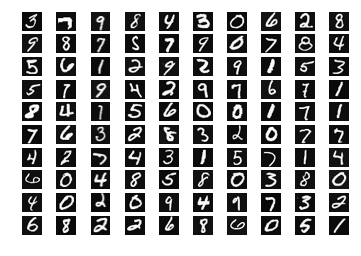

In [13]:
handwritten_visualize(X, 10, 10)

Train and test the neural network with the given handwritten datasets.

We will create a three layers ANN, so, the number of neural node in the first layer will be 400, the size of output layer will be 10 and the size of hidden layers will be set as 25 (or any size as you want for other application), the size of hidden layer should be carefully selected, however the methods to choose a proper size is out of the scope of this tutorial.

We will use all the 5000 examples to train the ANN model and randomly select 50 samples to test the trained ANN. Comprehensive test, like seperate datasets as three subset for training, testing and validaton separately, should be conducted in the future. 

In [7]:
def hw_demo(Xd, yd):
    train_set = []
    test_set = []
    train_set_size = 4950
    test_size = 50
    
    for idx in range(train_set_size):
        x = Xd[idx].reshape((-1,1))

        y = np.eye(10)[yd[idx]-1].reshape((-1, 1))

        train_set.append([x, y])

    # randomly choose some samles to test trained model
    for i in range(test_size):
        idx = int(np.random.rand() * len(Xd))
        x = Xd[idx].reshape((-1,1))
        y = np.eye(10)[yd[idx]-1].reshape((-1, 1))
        test_set.append([x, y])
    # create a network with two input, two hidden, and one output nodes
    n = NN(400, 25, 10)
    
    # train it with some patterns
    dt_st = datetime.datetime.now()
    print ("train start at: {0}".format(dt_st))
    
    n.train(train_set, 400, 10.1)
    
    dt_end = datetime.datetime.now()
    print ("train end at: {0}".format(dt_end))
    print ("time elapse in traininf: {0} seconds".format((dt_end-dt_st).seconds))
    
    n.test(test_set)

In [8]:
hw_demo(X, y)

train start at: 2015-09-04 12:57:55.825931
error: [ 773.86911011]
error: [ 360.69653141]
error: [ 269.40528115]
error: [ 225.15997401]
error: [ 199.42270836]
error: [ 182.13036236]
error: [ 170.30714659]
error: [ 162.11687634]
train end at: 2015-09-04 13:03:29.483078
time elapse in traininf: 333 seconds
(4, 'vs.', 4)
(7, 'vs.', 7)
(5, 'vs.', 5)
(5, 'vs.', 5)
(4, 'vs.', 4)
(9, 'vs.', 9)
(9, 'vs.', 9)
(6, 'vs.', 6)
(10, 'vs.', 10)
(3, 'vs.', 3)
(3, 'vs.', 3)
(10, 'vs.', 10)
(3, 'vs.', 3)
(2, 'vs.', 2)
(7, 'vs.', 7)
(2, 'vs.', 2)
(2, 'vs.', 2)
(10, 'vs.', 10)
(7, 'vs.', 7)
(5, 'vs.', 5)
(4, 'vs.', 4)
(10, 'vs.', 10)
(5, 'vs.', 5)
(7, 'vs.', 7)
(1, 'vs.', 5)
(1, 'vs.', 1)
(3, 'vs.', 5)
(5, 'vs.', 5)
(10, 'vs.', 10)
(2, 'vs.', 2)
(6, 'vs.', 6)
(8, 'vs.', 8)
(9, 'vs.', 9)
(10, 'vs.', 10)
(5, 'vs.', 5)
(4, 'vs.', 9)
(4, 'vs.', 4)
(3, 'vs.', 3)
(9, 'vs.', 9)
(6, 'vs.', 6)
(4, 'vs.', 4)
(10, 'vs.', 10)
(4, 'vs.', 4)
(3, 'vs.', 3)
(3, 'vs.', 3)
(3, 'vs.', 3)
(5, 'vs.', 5)
(1, 'vs.', 1)
(6, 'vs.'

###results
So, seems amazing, just give it the handwritting image, the model can recognize your written number. Note that you results may be different with mine do to the random weight initialization. The train takes me around 15 minutes on a macbook pro with core i7 @ 2.00Ghz, single core. in this version, I simply use gradient descent optimization algorithm, it converges very slowly, I will try to use other algorithms(like conjugate gradient algorithm) in the next step.

Also you can see that the train error convereged gracefully.

### note to help understanding 
as far as I know, remember all parameter dimension in mind coulf help you a lot to understand the model. for example, as show in the aboving demo, we used 25 nodes (bias not included)
